In [1]:
# Imports

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Make Python scripts available to Jupyter notebook
%run helper_functions


In [21]:
# Get data set

# Set Path
file_name = 'heart_data.csv'
file_path = refactor_path(f"{os.getcwd()}/Data_Sets/{file_name}")

# Convert Pandas dataframe
df = pd.read_csv(file_path)


In [ ]:
# Explore data set

# Display dataframe
print(f"DataFrame:\n{df}")

# Display summary
print(f"\nSummary:")
df.info()

# Display statistics
print(f"\nStatistics:")
df.describe(include='all')


DataFrame:
      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    2

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [26]:
# Prep dataset

# Fill missing value with row above/below value
df = df.ffill()
df = df.bfill()

In [13]:
# Set the features and the label

# Label
y_label_name = 'TenYearCHD'
y_label_classes = df[y_label_name].unique()
print(f"y_label_classes: {y_label_classes}")

# Features
x_feature_names = list(df.columns)
x_feature_names.remove(y_label_name)
print(f"x_feature_names: {x_feature_names}")

# Convert to NumPy arrays
np_x_feature = df[x_feature_names].to_numpy() 
np_y_label = df[y_label_name].to_numpy()

y_label_classes: [0 1]
x_feature_names: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [14]:
# Set training variables
test_size=0.25
random_state=0

In [20]:
# Model Full Set

# Train
model = LogisticRegression(solver='liblinear', random_state=random_state).fit(np_x_feature, np_y_label)

# Predict
y_predict = model.predict(np_x_feature)

# Evaluate
b_intercept = model.intercept_
m_slope = model.coef_
r2 = model.score(np_x_feature, np_y_label)
cm = confusion_matrix(np_y_label, y_predict)
print(f"b_intercept: {b_intercept}")
print(f"m_slope: {m_slope}")
print(f"r2: {r2}")
print(f"cm: {cm}")


b_intercept: [-5.61978035]
m_slope: [[ 4.59483300e-01  5.14740310e-02 -5.71517061e-02 -6.07864339e-02
   2.10679822e-02  2.65039901e-01  8.08284928e-01  4.19605777e-01
   4.30247991e-01  7.79993603e-04  1.34710043e-02 -8.85467604e-03
  -1.29802372e-02 -6.60025386e-03  4.32073056e-03]]
r2: 0.8541764983482775
cm: [[3579   15]
 [ 603   41]]


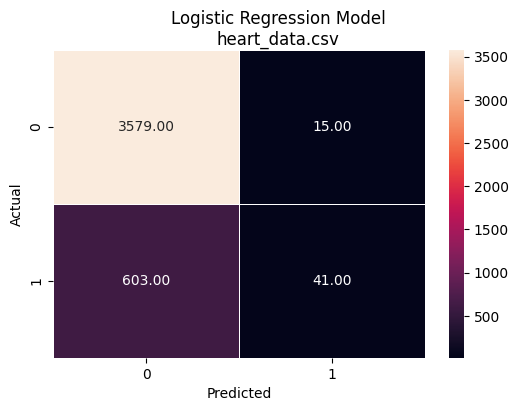

In [16]:
# Visualize Full Set

fig = plt.figure(figsize=(6,4))
fig.suptitle(f"Logistic Regression Model\n{file_name}")
ax = sns.heatmap(cm, annot=True, fmt=".2f", linewidth=.5)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(y_label_classes)
ax.set_yticklabels(y_label_classes)
plt.show()

In [17]:
# Model Split Set

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(np_x_feature, np_y_label, test_size=test_size, random_state=random_state)

# Train
model_split = LogisticRegression(solver='liblinear').fit(x_train,y_train)

# Predict
y_predict_split = model_split.predict(x_test)

# Evaluate
b_intercept_split = model_split.intercept_
m_slope_split = model_split.coef_
r2_split = model_split.score(x_test,y_test)
cm_split = confusion_matrix(y_test, y_predict_split)
print(f"b_intercept_split: {b_intercept_split}")
print(f"m_slope_split: {m_slope_split}")
print(f"r2_split: {r2_split}")
print(f"cm_split: {cm_split}")


b_intercept_split: [-5.2214803]
m_slope_split: [[ 3.95015397e-01  4.77332509e-02 -4.56963835e-02 -7.87078563e-02
   2.34141575e-02  8.78613022e-02  8.45122289e-01  5.21275412e-01
   6.86365710e-01  6.38720314e-04  1.50681619e-02 -1.70960258e-02
  -2.39208264e-03 -5.72408216e-03  3.05972281e-03]]
r2_split: 0.8424528301886792
cm_split: [[886   4]
 [163   7]]


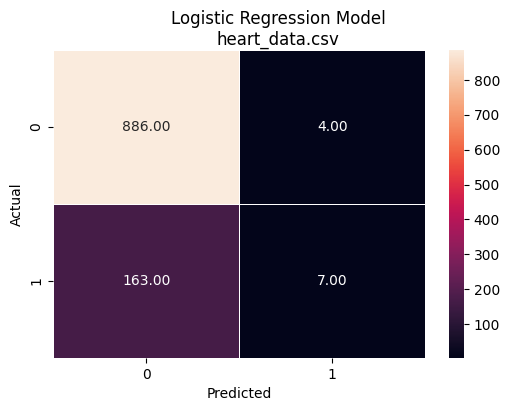

In [18]:
# Visualize Split Set

fig = plt.figure(figsize=(6,4))
fig.suptitle(f"Logistic Regression Model\n{file_name}")
ax = sns.heatmap(cm_split, annot=True, fmt=".2f", linewidth=.5)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(y_label_classes)
ax.set_yticklabels(y_label_classes)
plt.show()